# Exercise 5 - Introduction to Filtering

## Objectives
- To learn about digital filters
- To investigate a direct-method of filtering in the frequency-domain
- To learn about filters as LTI systems


In [71]:
import os
os.makedirs('results/ex5', exist_ok=True)

## Lab Exercise

### What is a Digital Filter?

The purpose of a digital filter, like any other filters, is to enhance and suppress some frequency components in a signal. This is referred to as frequency selectivity. In this lab, we will restrict ourselves to filters that are linear and time-invariant. 
>- A filter is linear if the response to the sum of the two inputs is equals to the sum of the individual responses taken separately.
>- A time-invariant filter is one whose characteristics do not alter with time. 

We make these two restrictions because they greatly simplify the mathematics involved. Linear time-invariant filters may also be made from analogue components such as resistors, capacitors, inductors and op-amps.

<img src="img/ex5_rlc.svg" alt="Drawing" style="width: 650px"/>
<center>Figure 5.1: Series RLC circuit </center>

**Question 5.1** Derive the frequency response, $H(\omega)$, of the RLC circuit in Fig. 5.1.

>**Answer 5.1**
>
>The frequency response $H(\omega)$ is given by: $$H(\omega) = \frac{v_{out}(t)}{v_{in}(t)} = \frac{\frac{1}{j\omega C}}{R + j\omega L + \frac{1}{j\omega C}} = \frac{1}{(j\omega)^2 LC + j\omega RC + 1}$$ From the frequency response, we can observe two things:
>1. This is a 2nd order filter - due to the greatest $j\omega$ term having a power $2$
>2. that it is low pass.  -  $H(j\omega)$ attenuates to 0 as $\omega$ tends to infinity


This type of filter is a 2nd order **analogue** low-pass filter; in the remainder of this lab we will focus mainly on **digital** filters. You can learn about how to convert an analogue filter into a digital one in the third year DSP course.

### Direct Method in the Frequency-Domain

An obvious way to filter a signal is to modify its frequency components or spectrum. The steps are:

1. Take the DFT of the signal to obtain its frequency-domain representation or spectrum.
2. Set unwanted components in the spectrum to zero.
3. Take the inverse DFT of the modified spectrum.

### Lab Exercise

Let us filter part of a song, `track_1.wav`, by removing all components above 300 Hz. Before this, listen to the original track so that you can compare it with the filtered signal:

<audio controls src="files/track_1.wav"> 
</audio>

To generate the filtered waveform, run the following code and listen to the output

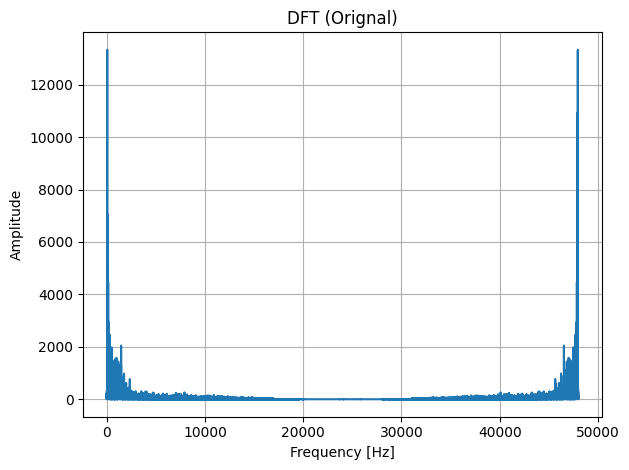

<Figure size 640x480 with 0 Axes>

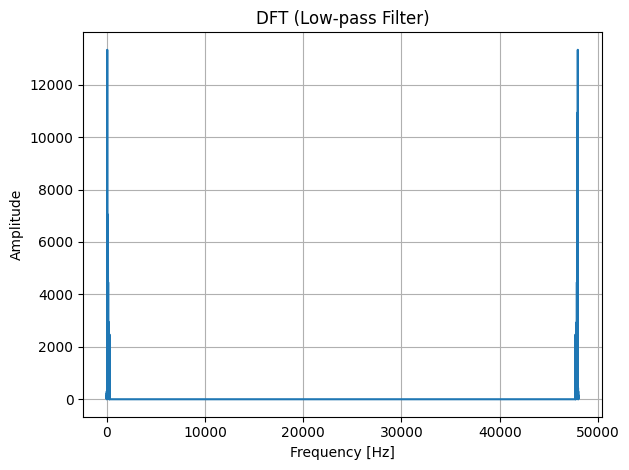

Filtered Audio Output (Low-pass):


<Figure size 640x480 with 0 Axes>

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

from scipy.fft import fft
from scipy.fft import ifft
from functions.lab_functions import plot_signal

x, fs = sf.read('files/track_1.wav') 
Tsamp = 1/fs
Nsamp = len(x)

X = fft(x);

cutoff = 300
n = round(cutoff/fs*Nsamp) # calculate the frequency index

f_step = np.arange(0, fs, fs/Nsamp);

plt = plot_signal(f_step, abs(X), title='DFT (Orignal)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()
plt.savefig('results/ex5/dft_original.pdf')

X[n:-n] = 0; # Set unwanted frequencies to zero

plt = plot_signal(f_step, abs(X), title='DFT (Low-pass Filter)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()
plt.savefig('results/ex5/dft_lowpass.pdf')

y = ifft(X);

sf.write('results/ex5/track_1_lowpass.wav', np.real(y), fs)
print('Filtered Audio Output (Low-pass):')
ipd.Audio('results/ex5/track_1_lowpass.wav') # display audio player

>**NOTE:** The graph is plotted in an odd way, where the frequency diagram is plotted up to the the sampling frequency $f_s$. This means that we will observe symmetry about the Nyquist frequency, $f_s/2$. An easier to understand diagram would be to plot the DFT between $-f_s$ and $f_s$. Doing this, we would more clearly observe the symmetry between the negative and positive frequencies.

array([115.80633545,  25.01123189,  55.21080957, ...,  23.01644147,
        55.21080957,  25.01123189])

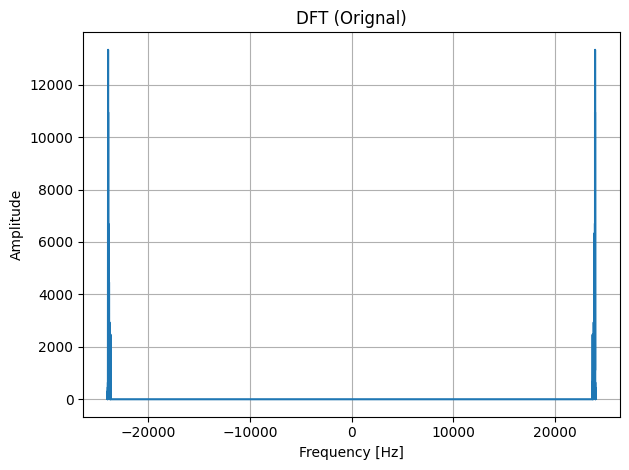

In [73]:
f_step = np.arange(-fs/2, fs/2, fs/Nsamp)
plot_signal(f_step, abs(X), title='DFT (Orignal)', xlabel='Frequency [Hz]', ylabel='Amplitude')
abs(X)

**Question 5.2**: Now try to modify the code below to create a high-pass filter by removing all components below 300 Hz. Listen to the output `track_1_highpass.wav`

>**GTA Tip**
>
>Note that the filtered waveform should still be real. If your result is not real it is because you have destroyed the conjugate symmetric property in the frequency domain that makes the signal real in the time domain.


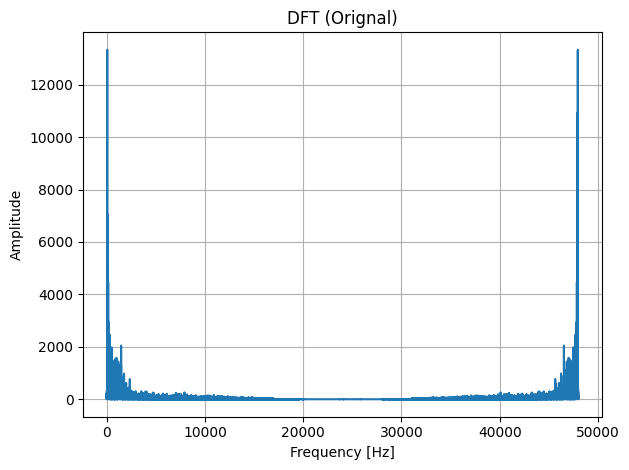

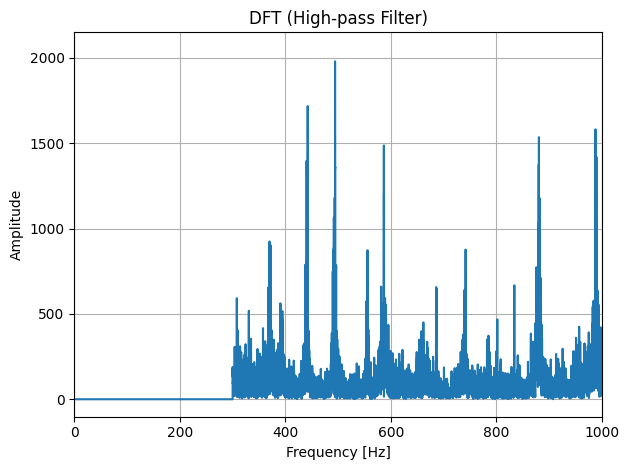

Filtered Audio Output (Low-pass):


<Figure size 640x480 with 0 Axes>

In [74]:
# add your code here
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd

from scipy.fft import fft
from scipy.fft import ifft
from functions.lab_functions import plot_signal

x, fs = sf.read('files/track_1.wav') 
Tsamp = 1/fs
Nsamp = len(x)

X = fft(x);

cutoff = 300
n = round(cutoff/fs*Nsamp) # calculate the frequency index

# calculateing the frequency index
# 1. calculate the ratio: cutoff / sampling frequency
# 2. multiply by the number of samples: ratio * Number of samples
# 3. round to integer: round(ratio * Number of samples)

f_step = np.arange(0, fs, fs/Nsamp);

plt = plot_signal(f_step, abs(X), title='DFT (Orignal)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.show()

X[:n] = 0
X[-n:] = 0
plt = plot_signal(f_step, abs(X), title='DFT (High-pass Filter)', xlabel='Frequency [Hz]', ylabel='Amplitude')
plt.xlim(0, 1000)
plt.show()
plt.savefig('results/ex5/dft_highpass.pdf')

y = ifft(X);

sf.write('results/ex5/track_1_lowpass.wav', np.real(y), fs)
print('Filtered Audio Output (Low-pass):')
ipd.Audio('results/ex5/track_1_lowpass.wav') # display audio player 

**Question 5.3**: What are the disadvantages of filtering in the frequency domain?


>**Answer 5.3**
>
>Filtering in the frequency domain can remove information from the signal. The process of tranforming the signal between the time and frequency domain can be computationally expensive. Filtering in the frequency domain is also only possible for a signal which is stationary in time. 
>
>**From TA:** Defining the signal only at discrete frequency points. in between those points, its not defining anything, information is lost. Filter is only defined between 0 and fs/2, meaning that the DTFT of the signal is periodic. A DTFT that is not periodic is fundamentally a different signal in the time domain compared to one that is periodic.

It is useful to know that if a signal $x[n]$ has a special property in the time domain then there will be a corresponding property in the frequency domain, $X(e^{j\Omega}) \text{ and } X[k]$ (and vice versa).

| One Domain           | Other Domain             
| -------------------- | ------------------------ 
| Discrete             | Periodic                 
| Symmetric            | Symmetric                 
| Antisymmetric        | Antisymmetric             
| Real                 | Conjugate Symmetric       
| Imaginary            | Conjugate Antisymmetric   
| Real & Symmetric     | Real & Symmetric          
| Real & Antisymmetric | Imaginary & Antisymmetric
 
$\begin{align}
\quad \text{Symmetric: } &x[n]=x[-n]\\
&X(e^{j\Omega})=X(e^{-j\Omega})\\
&X[k]=X[(-k)_{\text{mod} N}]=X[N-k] \text{ for } k>0
\end{align}$

$\quad$ Conjugate Symmetric: $x[n]=x^*[-n]$ 

$\quad$ Conjugate Antisymmetric: $x[n]=-x^*[-n]$ 

The filters we have just created using the direct method above have the following frequency responses
<table><tr>
<td> <img src="img/ex4_1.png" alt="Drawing" style="width: 420px;"/> </td>
<td> <img src="img/ex4_2.png" alt="Drawing" style="width: 420px;"/> </td>
</tr></table>

**Question 5.4**: In the plot above, the frequency response is perfect at the sample points but not between them. Can you explain why?

>**Answer 5.4**
>
>Filtering in the frequency domain nets a discrete signal, that is only defined at specific sample points in time. This is why the response is perfect at those sample points and only those sample points. For points which are between samples, the signal is undefined - information is lost and hence the plot shows that they values between them are 'not correct', meaning they carry no useful information about the signal.

### Filtering using LTI system properties
We have now seen how we can filter a signal by setting all unwanted frequency components (**direct method**) but this is not the only, nor the best, way to filter a signal. Instead, you can view a filter as an LTI system with an impulse/frequency response which will attenuate or enhance certain frequencies.

<img src="img/ex5_1.svg" alt="Drawing" style="width: 900px;"/>
<center>Figure 5.2: Impulse response of a filter</center>

**Question 5.5** We now know that $h[n]$ is the impulse response of a filter. How can you obtain its frequency response $H(j\Omega)$? Give the appropriate formula.

>**Answer 5.5**
>
>Since $h[n]$ is a discrete time non periodic signal, the Discrete Time Fourier Transform (DTFT) can be used to calculate the frequency response $H\left(e^{j\Omega}\right)$: $$H\left(e^{j\Omega}\right) = \sum_{n = -\infty}^\infty h[n]e^{-j\Omega n}$$ 
>Based on the time domain impulse plots above, we know that the impulse response, $h[n]$, is only defined between $[0, 3]$, taking $0$ through all other $n$. Therefore, we can now say that the Frequency Response, $H(e^{j\omega})$ can be defined as:$$H(e^{j\Omega}) = \sum_{n=0}^3h[n]e^{-j\Omega n}$$ Where $\Omega$ is the frequency range, varying continuously between $-\pi$ and $\pi$.

Let us consider this simple filter with impulse response
$$h[n]=\big[0.25,\, 0.25,\, 0.25,\, 0.25\big]$$

**Question 5.6** What is the frequency response of this filter? Is it low-pass or high-pass?

>**Answer 5.6**
>
>The fastest way to do this is to use the DTFT as shown above in *Answer 5.5*. The frequency response is then calculated by: $$H\left(e^{j\Omega}\right) = \sum_{n = 0}^\infty h[n]e^{-j\Omega n} = \frac{1}{4}\left(1 + e^{-j\Omega} + e^{-2j\Omega} + e^{-3j\Omega}\right)$$
>
>NOTE: This signal represents a moving average, where it takes the average of 4 discrete points at once. Hence it should be observable that the impulse response has a 'smoothing' effect on signals. Also take note that the notation $H(e^{j\omega})$ is a stricter definition than $H(j\omega)$. $H(e^{j\omega})$ simply specifies that the Frequency Response is comprised strictly of complex exponentials, $e^{j\omega}$ as opposed to terms with just $j\omega$. 
>
>In this way, $H(e^{j\omega}) \in H(j\omega)$ but **NOT** the other way around $\left[\text{i.e. }  H(j\omega) \notin H(e^{j\omega})\right]$. 

#### Click for wrong answer

>**Answer 5.6.1 THIS ANSWER IS NOT CORRECT**
>
>This was my initial answer. It is a roundabout way of obtaining the same thing. Since I changed the discrete function into a continuous one and then took a Fourier Transform as opposed to just applying the DTFT directly.
>
>First recall that the impulse response, $h(t)$ can be expressed as the sum of the shifted Dirac delta functions:$$h(t) = \sum_{k=0}^\infty h[k]\delta(t-k)$$
>Next, recall that the formula for a fourier transform of a signal is given by: $$X(\omega) = \int_{-\infty}^\infty x(t) * e^{-j\omega t} \, dt$$
>Also take note of the unique identity for the Fourier Transform of the Dirac delta function: $$\int_{-\infty}^\infty x(t)*\delta(t-a)\, dt = x(a)$$
> Now, the frequency response can be calculated by taking the fourier transform of h(t):$$H(j\omega) = \int_{-\infty}^\infty h(t)*e^{-j\omega t} \, dt = \frac{1}{4} \sum_{k=0}^3 \int_{-\infty}^\infty e^{-j\omega t}*\delta(t-k) \, dt = \frac{1}{4}\left(e^{0} + e^{-j\omega} + e^{-2j\omega} + e^{-3j\omega}\right)$$
>Hence, the corresponding frequency response of this filter can be given by: $$H(j\omega) = \frac{1}{4} (1 + e^{-j\omega} + e^{-2j\omega} + e^{-3j\omega})$$
>Since the function is comprised purely of complex exponentials, the frequency response $H(j\omega)$ can be rewritten as $H(e^{j\omega})$:$$H(e^{j\omega}) = \frac{1}{4} (1 + e^{-j\omega} + e^{-2j\omega} + e^{-3j\omega})$$

#### Continue with Lab 5

**Question 5.7** Use the frequency response to determine $y[n]$ for $x[n]=\sin(\frac{\pi}{2} n)$. Check your answer using the code cell below.

**FROM TA:** x[n] is discrete periodic in time and continuous in frequency -> use DTFS to find the multiplication in the frequency domain based on $H(j\omega)$

>**Answer 5.6**
>
>NOTE: We are trying to check if answers in the frequency domain is correct. Therefore we should be be working in the time domain to output something in the frequency domain.
>
>Recall that $y[n]$ is the convolution of the input signal $x[n]$ and the impulse response $h[n]$. As such, recall that the convolution formula of $x[n]$ and $h[n]$ is given by: $$\sum_{k = \infty}^\infty x[k] \cdot h[n-k]$$
>Given that: $$h[n] = [0.25, 0.25, 0.25, 0.25]$$ Since the values of values of $k$ are only non-zero between 0-3 and $h[n] = \frac{1}{4}$ for all $n$ in range.
>


# Cant tell if need to use DTFS or DTFT so tried both [check this week]

> Also note that the input signal $x[n]$ is a discrete time periodic signal with period $N = 4$. Recall the formula for the DTFS equation:$$X[k] = \frac{1}{N}\sum_{n=0}^{N-1}x[n]e^{-jk\Omega_0 n}$$ where $\Omega_0$ is the frequency index and $\Omega_0= \frac{2\pi}{N} = \frac{2\pi}{4} = \frac{\pi}{2}$.
>
>Hence, we can calculate the DTFS of the signal $x[n]$: $$X[k] = \frac{1}{4}\sum_{n=0}^{4-1}x[n]e^{-jk\frac{\pi}{2}n} = \frac{1}{4}\left[sin(0) + sin\left(\frac{\pi}{2}\right)e^{-jk\frac{\pi}{2}} + sin\left(\pi\right)e^{-jk\pi} + sin\left(\frac{3\pi}{2}\right)e^{-jk\frac{3\pi}{2}}\right] = \frac{1}{4}\left(e^{-jk\frac{\pi}{2}}-e^{-jk\frac{3\pi}{2}}\right)$$
>
>Now with both the input signal and the impulse response in the frequency domain, we can find the convolution of the signals by multiplying them:$$H\left(e^{j\Omega}\right) = \frac{1}{4}\left(1 + e^{-j\Omega} + e^{-2j\Omega} + e^{-3j\Omega}\right)$$
>$$X[k] = \frac{1}{4}\left(e^{-jk\frac{\pi}{2}}-e^{-jk\frac{3\pi}{2}}\right)$$
>The Convolution $x[n]*h[n]$ is can be found by multiplying both signals together:$$\frac{1}{4}\left(1 + e^{-j\Omega} + e^{-2j\Omega} + e^{-3j\Omega}\right)\cdot$$

>Hence we can calculate the DTFT of the signal $x[n]$: $$X(e^{j\Omega}) = \sum_{n=0}^{\infty}x[n]e^{-j\Omega n} = sin(0)+ sin\left(\frac{\pi}{2}\right)e^{-j\Omega} + sin(\pi)e^{-2j\Omega} + sin\left(\frac{3\pi}{2}\right)e^{-3j\Omega} + ... = e^{-j\Omega} - e^{-3j\Omega} + ...$$
>$$X(e^{j\Omega}) = e^{-j\Omega} + e^{-5j\Omega}+ e^{-9j\Omega}+... - \left(e^{-3j\Omega} + e^{-7j\Omega}+ e^{-11j\Omega} + ...\right)$$
>Decomposing the infinite exponentials, we can observe that $X(e^{j\Omega})$ consists of two infinite geometric progressions:
>$$X(e^{j\Omega}) = e^{-j\Omega} + e^{-j\Omega}e^{-4j\Omega}+ e^{-j\Omega}e^{-4j\Omega}e^{-4j\Omega}+... - \left(e^{-3j\Omega} + e^{-3j\Omega}e^{-4j\Omega}+ e^{-3j\Omega}e^{-4j\Omega}e^{-4j\Omega} + ...\right)$$
>Hence:$$X(e^{j\Omega}) = \frac{e^{-j\Omega}}{1-e^{-4j\Omega}} - \frac{e^{-3j\Omega}}{1-e^{-4j\Omega}} = \frac{e^{-j\Omega}-e^{-3j\Omega}}{1-e^{-4j\Omega}} = \frac{e^{3j\Omega}-e^{j\Omega}}{e^{4j\Omega}-1}$$
>We can now multiply the two signals together to find the convolution of the signal:$$x[n]*h[n] = \frac{1}{4}\left(1 + e^{-j\Omega} + e^{-2j\Omega} + e^{-3j\Omega}\right) \cdot \frac{e^{3j\Omega}-e^{j\Omega}}{e^{4j\Omega}-1} = $$

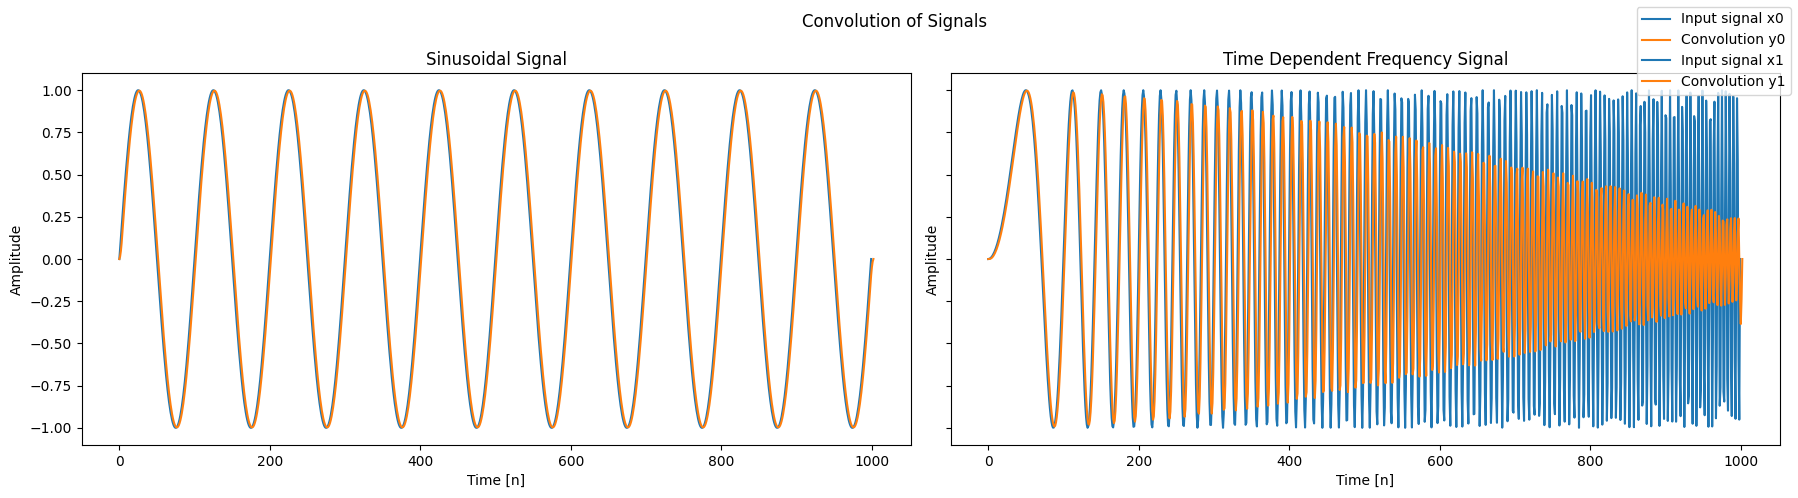

In [75]:
# setting signal frequency to 1 and plotting 1000 samples
f = 1
n = np.linspace(0, 10, 1000)

# defining the time signals x[n]
x0 = np.sin(n * 2* np.pi *f)
x1 = np.sin(n * 2* np.pi *n*f)

# Define the impulse response h[n]
h = np.array([0.25, 0.25, 0.25, 0.25])

# Compute the frequency response y[n]
y0 = np.convolve(x0, h)
y1 = np.convolve(x1, h)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 5))
ax[0].plot(x0, label='Input signal x0')
ax[0].plot(y0, label='Convolution y0')


ax[1].plot(x1, label='Input signal x1')
ax[1].plot(y1, label='Convolution y1')

fig.suptitle('Convolution of Signals')
ax[0].set_title('Sinusoidal Signal')
ax[0].set_xlabel('Time [n]')
ax[0].set_ylabel('Amplitude')

ax[1].set_title('Time Dependent Frequency Signal')
ax[1].set_xlabel('Time [n]')
ax[1].set_ylabel('Amplitude')
fig.legend()

fig.tight_layout()
fig.savefig('results/ex5/convolution.pdf')

>**NOTE:** By squaring the input signal in the sinusoidal, we have effectively created a signal which has a frequency dependent on time. In this way, we observe that as n increases, the frequency of the signal also increases. This is useful to observe the attenuation at high frequencies in greater detail. As working with a sinusoidal signal with a singular frequency, all we can observe is a slight offset off the signal where the filter removes some frequency component equally across the full signal.

# Need to check how to interpret PHASE again

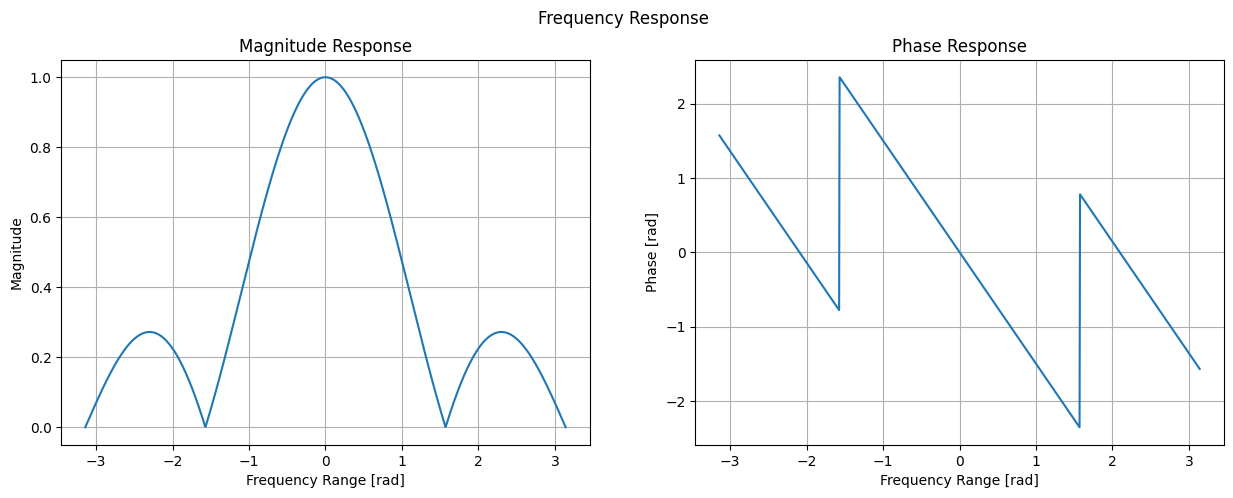

In [77]:
# Plotting the Magnitude and Phase Response of the Impulse Response
omega = np.linspace(-np.pi, np.pi, 1000)
H = 0.25*(1 + np.exp(-1j*omega) + np.exp(-2j*omega) + np.exp(-3j*omega))
magH = abs(H)
phaseH = np.angle(H)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(omega, magH)
ax[1].plot(omega, phaseH)


fig.suptitle('Frequency Response')
ax[0].set_title('Magnitude Response')
ax[0].set_xlabel('Frequency Range [rad]')
ax[0].set_ylabel('Magnitude')
ax[0].grid()

ax[1].set_title('Phase Response')
ax[1].set_xlabel('Frequency Range [rad]')
ax[1].set_ylabel('Phase [rad]')
ax[1].grid()
fig.savefig('results/ex5/frequency_response.pdf')

>**NOTE:** Here we can observe both the magnitude and the phase and frequency response of the impulse function $h[n]$. 
>From the Magnitude Response, we can observe that it is low pass, allowing low frequencies near the origin to pass with full magnitude, while attenuating the higher frequencies. 
>From the Phase Response, we can observe that the signal will be delayed by a value__.

Remember that convolution in the time-domain is equivalent to multiplication in the frequency-domain; this can also be used to filter signals in the frequency domain. 

**Bonus Question** Repeat the previous question using a frequency-domain implementation. You can use Python's `fft` and `ifft` functions to obtain the DFT and inverse DFT of $x[n],h[n]$ and $y[n]$. Make sure to zero-pad $x[n]$ and $h[n]$ such that their lenghts are `len(x)+len(h)-1`.

The filter described here has a very simple form. In practice, you can use filter design techniques to create filters with more sofisticated frequency responses, which we will do in the next exercise.